In [47]:
import numpy as np

In [48]:
def cross_validation_error(X, y, model, folds=5):
    X_folds = np.array_split(X, folds)
    y_folds = np.array_split(y, folds)
    train_error = []
    val_error = []
    for j in range(folds):
        x_test = X_folds[j]
        y_test = y_folds[j]
        x_train = np.vstack([X_folds[i] for i in range(folds) if i != j])
        y_train = np.concatenate([y_folds[i] for i in range(folds) if i != j])
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
        y_train_pred = model.predict(x_train)
        train_error.append(np.average(y_train_pred != y_train))
        val_error.append(np.average(y_test_pred != y_test))
    return np.round(np.average(train_error), 3), np.round(np.average(val_error), 3)

In [49]:
from sklearn.svm import SVC
def svm_results(X_train, y_train, X_test, y_test):
    lam = [1e-4, 1e-2, 1e-0, 1e2, 1e4]

    models = [SVC(kernel='linear',C=1/l) for l in lam]
    avarege_errors = [cross_validation_error(X_train, y_train, model) for model in models]
    test_errors = []

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_errors.append(np.round(np.average(y_pred != y_test), 3))
    results = {f'SVM_lambda_{l}': (avg[0], avg[1], test) for avg, test, l in zip(avarege_errors, test_errors, lam)}
    return results

In [50]:
import matplotlib.pyplot as plt
def plot_SVM_CV_results(avg_train_error,avg_val_error,test_error,lamda):
    bar_width = 0.2
    bar = np.arange(len(lamda))

    plt.bar(bar - 0.2, avg_train_error, width=bar_width, label='Avg train error',
            edgecolor='black', align='center')
    plt.bar(bar, avg_val_error, width=bar_width, label='Avg validation error',
            edgecolor='black', align='center')
    plt.bar(bar + 0.2, test_error, width=bar_width, label='test error',
            edgecolor='black', align='center')
    plt.xlabel('\u03BB')
    plt.ylabel('Error Rate')
    plt.xticks(bar, lamda)
    plt.title("Average Train and validation error and Test Error rate per lambda value")
    plt.legend()
    plt.show()

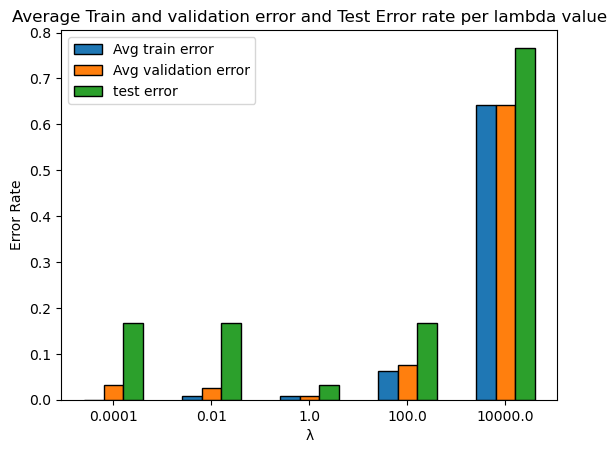

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X, y = iris_data['data'], iris_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


results = svm_results(X_train, y_train, X_test, y_test)
avg_train_error = []
avg_val_error = []
test_error = []
for k in results:
    avg_train_error.append(results[k][0])
    avg_val_error.append(results[k][1])
    test_error.append(results[k][2])

lam = [1e-4, 1e-2, 1e-0, 1e2, 1e4]
plot_SVM_CV_results(avg_train_error,avg_val_error,test_error,lam)

The best SVC-CV model is for lambda = 1.0 as well for the test set.
Lambda = 1.0 minimizes average train error, average validation error and test error.
For relatively small lambda we expect the model to overfit, thus to get a low training error and a high test error.
For relatively large lambda we expect the model to underfit,thus to get a high training error and a high test error.
Lambda = 1.0 reaches a balance between generalization and minimizing train errors.